# Variations in z-direction

*This notebook explores the variations in z-direction.*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5.


<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import my_functions as func

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_dict(func.load_results(), func.load_layout())

## Cylindricity

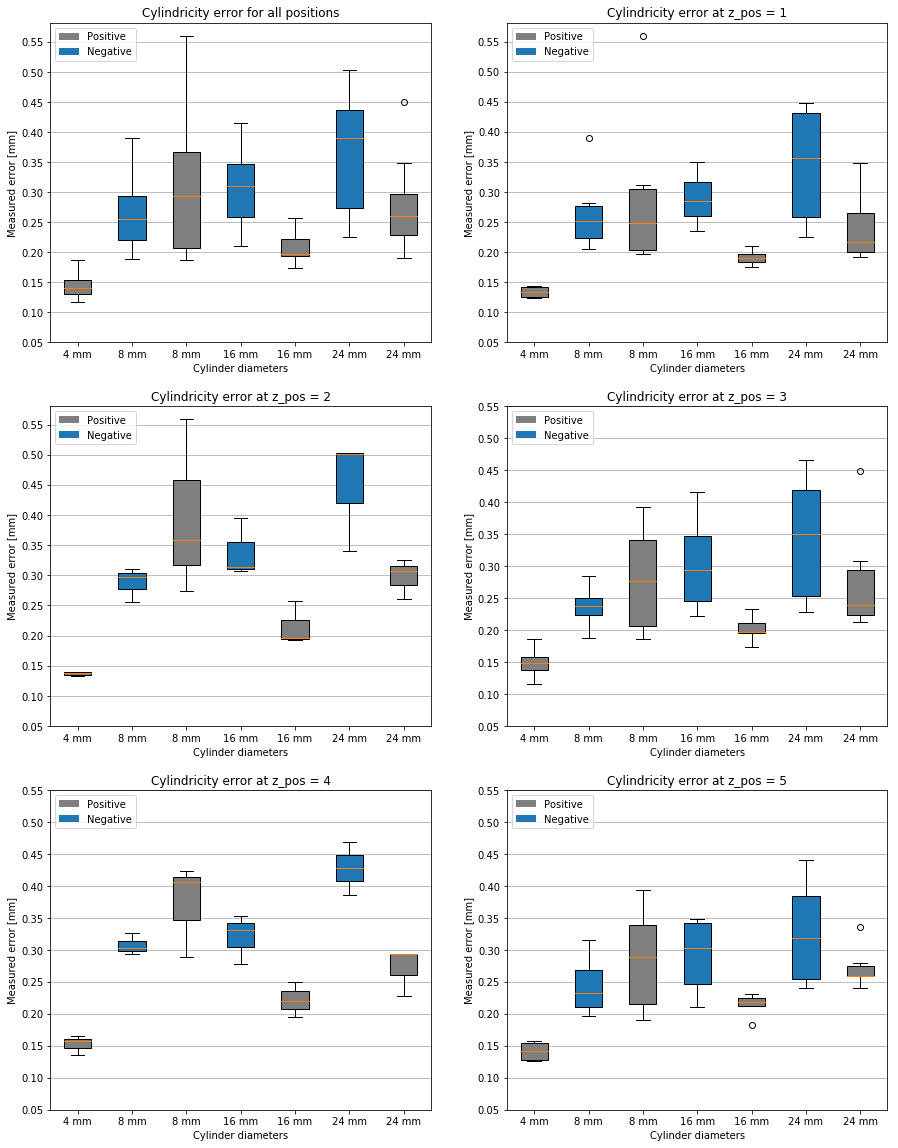

In [5]:
"""
Boxplots showing the variation in cylindricity of different dimension cylinders with respect to the z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['4 mm', '8 mm', '8 mm', '16 mm', '16 mm', '24 mm', '24 mm']

# Define colors
color1, color2 = 'tab:gray', 'tab:blue'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='Positive'),\
                  Patch(facecolor=color2, label='Negative')]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# First element of data-list contains all error values
data = [func.get_column('error', dfs)]

# Append to the data-list the z-layers one-by-one
for i in range(1,6):
    data.append(func.get_column('error', func.get_single_values('z_pos', i, dfs)))

# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Construct each plot
for i in range(3):
    for j in range(2):
        bplots.append(axs[i, j].boxplot(data[(i*2)+j], patch_artist=True, labels=labels))
        axs[i, j].set_title("Cylindricity error at z_pos = {}".format((i*2)+j))
        axs[i, j].legend(handles=legend_elements, loc='upper left')
        axs[i, j].set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
        axs[i, j].yaxis.grid(True)
        axs[i, j].set_xlabel("Cylinder diameters")
        axs[i, j].set_ylabel("Measured error [mm]")

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Revise title of first plot
axs[0, 0].set_title("Cylindricity error for all positions")

# Display figure
plt.show()

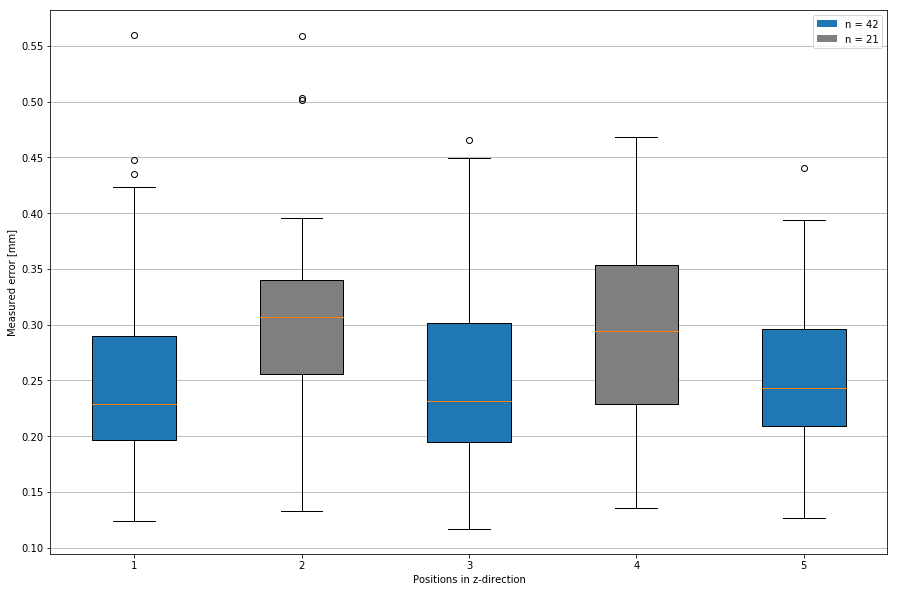

In [7]:
"""
Boxplots showing the variation in cylindricity of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['1', '2', '3', '4', '5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest
dfs = dfs[['error', 'z_pos']]

# Initiate empty list
data = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data[i] = dfs[dfs['z_pos'] == i+1]
    data[i] = data[i]['error']
    
# Initialize figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

bplots = [ax.boxplot(data, patch_artist=True, labels=labels)]
ax.set_yticks([.1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
ax.yaxis.grid(True)
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlabel("Positions in z-direction")
ax.set_ylabel("Measured error [mm]")

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Display figure
plt.show()

## Diameter

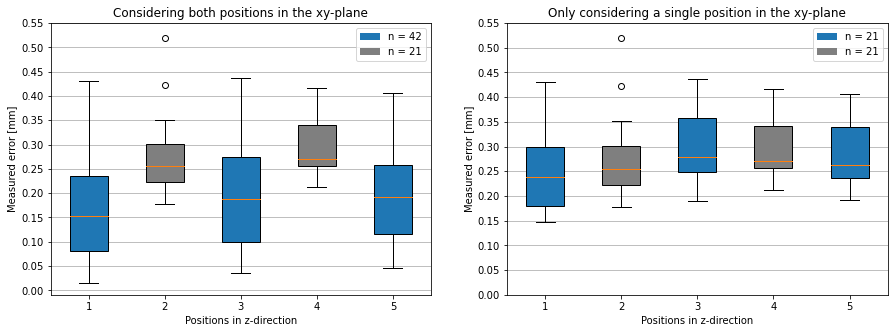

In [6]:
"""
Boxplots showing the variation in diameter of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['1', '2', '3', '4', '5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest and converting to absolute values
dfs = dfs[['error', 'z_pos', 'y_pos']]
dfs['error'] = dfs['error'].abs()

# Copy for T-test
dft = dfs

# Initialize figure as a grid of plots
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# Make two plots
for i in [0, 1]:
    # Initiate empty list
    data = [None] * 5
    
    # Extract the z-layers into separate DataFrame-objects in the list 'data'
    for j in range(5):
        data[j] = dfs[dfs['z_pos'] == j+1]
        data[j] = data[j]['error']
    
    # Set up the plot
    bplots = [axs[i].boxplot(data, patch_artist=True, labels=labels)]
    axs[i].set_yticks([0, 0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
    axs[i].yaxis.grid(True)
    axs[i].set_xlabel("Positions in z-direction")
    axs[i].set_ylabel("Measured error [mm]")
    axs[i].set_title("Considering both positions in the xy-plane" if i == 0 else \
                 "Only considering a single position in the xy-plane")
    axs[i].legend(handles=legend_elements if i == 0 else \
                  [Patch(facecolor=color1, label='n = 21'), Patch(facecolor=color2, label='n = 21')], \
                  loc='upper right')
    
    # Set color to the boxplots
    for bplot in bplots:
        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)
    
    # Remove the first row for the next iteration
    dfs = dfs[dfs['y_pos'] != 1]

# Display figure
plt.show()

<AxesSubplot:xlabel='z_pos', ylabel='error'>

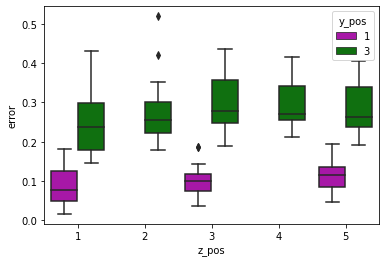

In [7]:
## Prepare data
# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest and converting to absolute values
dfs = dfs[['error', 'z_pos', 'y_pos']]
dfs['error'] = dfs['error'].abs()


## Plot data using seaborn module
# Create box-plot
sns.boxplot(x="z_pos", y="error", hue="y_pos", palette=['m', 'g', 'y'], data=dfs)

In [ ]:
"""dframe = func.my_t_test(dft[dft['y_pos'] != 1])

dframe.drop('T-statistic', level='type', inplace=True)

dframe.index = dframe.index.droplevel('type')

names = dframe.columns
data = dframe.unstack(level=0).dropna()

plt.figure(figsize=(15, 10))

plt.scatter(x=data[1], y=data[2])

plt.show()

print(data)

#dframe = pd.MultiIndex.to_frame(dframe)

dframe.index = dframe.index.droplevel(['type'])

data = dframe.unstack()


for i in range(data[1].size):
    for j in range(data[1].size):
        
        print(data[i+1][j+1])

#plt.figure(figsize=(15, 10))

"""

In [8]:
"""
Constructing 'dframe' from 'dft'

"""
dframe = func.get_p_vals(dft[dft['y_pos'] != 1])

dframe.fillna(0, inplace=True)

dframe

,1,2,3,4,5
1,0.000000,0.328062,0.065697,0.077344,0.227692
2,0.328062,0.000000,0.414315,0.471562,0.883333
3,0.065697,0.414315,0.000000,0.900907,0.454815
4,0.077344,0.471562,0.900907,0.000000,0.522397
5,0.227692,0.883333,0.454815,0.522397,0.000000


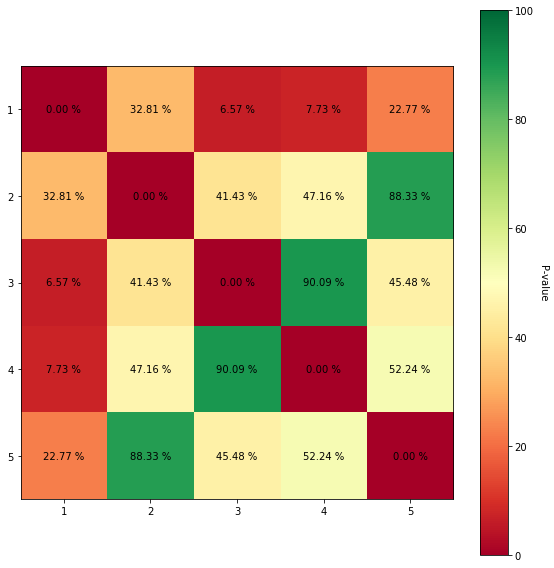

In [10]:
"""
Plotting 'dframe'

"""

# Set size (s) of matrix
s = 5

# Initialize matrix
p_vals = np.arange(s**2).reshape(s, s).astype(dtype=float)

# Fill matrix with values from dframe
for i in range(s):
    for j in range(s):
        p_vals[i][j] = dframe[i+1][j+1] * 100

# Set labels for all ticks
x_labels = dframe.columns
y_labels = dframe.columns

# Set colormap-palette
cmap = "RdYlGn"

# Initiate figure
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(p_vals, cmap=cmap, vmin=0, vmax=100)

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("P-value", rotation=-90, va="bottom")

# Show all ticks
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))

# Label ticks according to table
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)

# Loop over data dimensions and create text annotations.
for i in range(len(x_labels)):
    for j in range(len(y_labels)):
        ax.text(j, i, "{:.2f} %".format(p_vals[i, j]),
                       ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

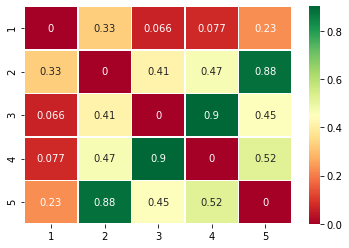

In [11]:
sns.heatmap(dframe, cmap="RdYlGn", annot=True, linewidths=.5)

plt.show()

In [37]:
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

df_t = func.df_from_dict(chars, char_dict)

df_t = pd.concat(df_t)

In [38]:
df_t = df_t[['error', 'x_pos', 'y_pos', 'z_pos', 'angle']]

#df_t = df_t[df_t['angle'] == -90]

df_t.head()

,error,x_pos,y_pos,z_pos,angle
part_name,,,,,
Leirmo_Exp1_Build1_#1,0.091050,1,1,1,70
Leirmo_Exp1_Build1_#10,0.103505,1,1,2,20
Leirmo_Exp1_Build1_#11,0.078500,2,1,2,15
Leirmo_Exp1_Build1_#12,0.075298,3,1,2,55
Leirmo_Exp1_Build1_#13,0.103748,1,2,2,135


In [11]:
# func.my_t_test(df_t, 'angle').to_csv("Data/T-test_Angle_Cylindricity.csv", sep=';')

## Flatness

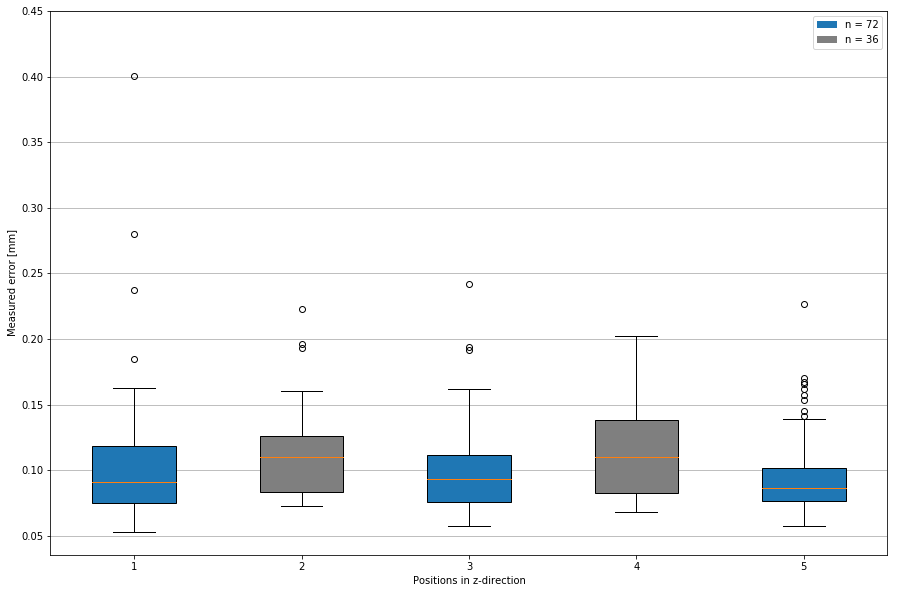

In [9]:
"""
Boxplots showing the variation in flatness of all HX-planes with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# List of lables for the boxplots
labels = ['1', '2', '3', '4', '5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest
dfs = dfs[['error', 'z_pos']]

# Initiate empty list
data = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data[i] = dfs[dfs['z_pos'] == i+1]
    data[i] = data[i]['error']
    
# Initialize figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

bplots = [ax.boxplot(data, patch_artist=True, labels=labels)]
ax.set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45])
ax.yaxis.grid(True)
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xlabel("Positions in z-direction")
ax.set_ylabel("Measured error [mm]")

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Display figure
plt.show()